In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# give the datafile name
datafile= 'C:\Users\elmasyr\Seafile\PW Project\PW Proj Shared Docs\data\matched word pivot files/78k_word_pivot.xlsx'
addin = '_78k'

#df = pd.read_csv(datafile, header=0, sep=',', encoding='utf-8')
df = pd.read_excel(datafile, header=0, sep=',', encoding='utf-8', sheet_name='matchfreqfinnw_names')
df.info() # could also use df_final.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11749 entries, 0 to 11748
Data columns (total 8 columns):
matched word       11748 non-null object
freq in pws        11749 non-null int64
freq in web        11749 non-null int64
individual freq    11749 non-null int64
POS                11749 non-null object
analysis           11749 non-null object
finnish word       11749 non-null bool
finnish name       11749 non-null bool
dtypes: bool(2), int64(3), object(3)
memory usage: 573.8+ KB


In [2]:
df.head()

,matched word,freq in pws,freq in web,individual freq,POS,analysis,finnish word,finnish name
0,salasana,224,16553,16173,NOUN,Case=Nom|Number=Sing,True,False
1,perkele,167,13111,4304,NOUN,Case=Nom|Number=Sing,True,False
2,paska,121,21359,20343,NOUN,Case=Nom|Number=Sing,True,False
3,kakka,110,2820,2786,NOUN,Case=Nom|Number=Sing,True,False
4,qwerty,109,774,283,NOUN,Case=Nom|Number=Sing,False,False


In [3]:
df = df.rename(columns={'matched word': 'word', 'finnish word': 'Finnish word', 'finnish name': 'Finnish name'})

### Function for rendering dataframe table to figure

In [4]:
#https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, rows=None, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='#40466e',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])#+np.array([8, 0])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, rowLabels=rows, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax


### Finnish names and words

#### freq in pws

In [5]:
'''Finnish name, percentage of all words used in passwords'''
(df[df['Finnish name']==True]['freq in pws'].sum()/float(df['freq in pws'].sum()))*100

44.509652919775874

In [6]:
'''Finnish name, percentage of unique words used in passwords'''
(df[df['Finnish name']==True]['freq in pws'].count()/float(df['freq in pws'].count()))*100

36.249893607966641

In [7]:
'''Finnish word, percentage of all words used in passwords'''
(df[df['Finnish word']==True]['freq in pws'].sum()/float(df['freq in pws'].sum()))*100

43.381044692885787

In [8]:
'''Finnish word, percentage of unique words used in passwords'''
(df[df['Finnish word']==True]['freq in pws'].count()/float(df['freq in pws'].count()))*100

42.020597497659374

In [9]:
dff = pd.DataFrame()

#### freq in web

In [10]:
'''Finnish name, percentage of all words used in web'''
(df[df['Finnish name']==True]['freq in web'].sum()/float(df['freq in web'].sum()))*100

24.898478234437992

In [11]:
'''Finnish name, percentage of unique words used in web'''
(df[df['Finnish name']==True]['freq in web'].count()/float(df['freq in web'].count()))*100

36.249893607966641

In [12]:
'''Finnish word, percentage of all words used in web'''
(df[df['Finnish word']==True]['freq in web'].sum()/float(df['freq in web'].sum()))*100

86.26527536699048

In [13]:
'''Finnish word, percentage of unique words used in web'''
(df[df['Finnish word']==True]['freq in web'].count()/float(df['freq in web'].count()))*100

42.020597497659374

#### As a small dataframe

In [14]:
dff.loc['Finnish word','percent in pws'] = \
'{0:.3}'.format(float((df[df['Finnish word']==True]['freq in pws'].sum()/float(df['freq in pws'].sum()))*100))
dff.loc['Finnish word','percent in web'] = \
'{0:.3}'.format(float((df[df['Finnish word']==True]['freq in web'].sum()/float(df['freq in web'].sum()))*100))
dff.loc['Finnish name','percent in pws'] = \
'{0:.3}'.format(float((df[df['Finnish name']==True]['freq in pws'].sum()/float(df['freq in pws'].sum()))*100))
dff.loc['Finnish name','percent in web'] = \
'{0:.3}'.format(float((df[df['Finnish name']==True]['freq in web'].sum()/float(df['freq in web'].sum()))*100))

dff

,percent in pws,percent in web
Finnish word,43.4,86.3
Finnish name,44.5,24.9


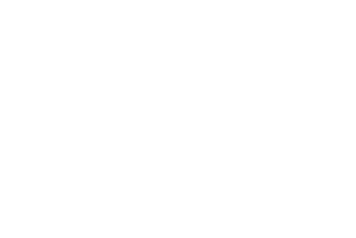

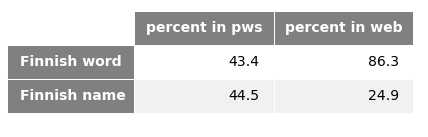

In [15]:
dft=dff
rows = [i for i in dft.index]
fign = 'finnish_percent'
pngfile = fign + '_' + addin + '.png'
epsfile = fign + '_' + addin + '.eps'

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

render_mpl_table(dft, header_columns=0, col_width=2.5, rows = rows, header_color='grey',  edge_color='w')

#plt.tight_layout()
#plt.savefig('posmorphtable_grey.png')
plt.savefig(pngfile, format='png', dpi=300, bbox_inches='tight')
plt.savefig(epsfile, format='eps', dpi=300, bbox_inches='tight');

In [16]:
df[df['word'].isin(['batman','aurinko'])]

,word,freq in pws,freq in web,individual freq,POS,analysis,Finnish word,Finnish name
95,aurinko,33,84299,71522,NOUN,Case=Nom|Number=Sing,True,True
516,batman,12,5080,3027,PROPN,Case=Gen|Number=Sing,False,False


### POS and morph frequencies

In [17]:
mypos = pd.DataFrame([str(val) for i, val in enumerate(df.POS)])
myanalysis = pd.DataFrame([str(val) for i, val in enumerate(df.analysis)])
df['label'] = mypos + ' ' +  myanalysis

In [18]:
df.head()

,word,freq in pws,freq in web,individual freq,POS,analysis,Finnish word,Finnish name,label
0,salasana,224,16553,16173,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
1,perkele,167,13111,4304,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
2,paska,121,21359,20343,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
3,kakka,110,2820,2786,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
4,qwerty,109,774,283,NOUN,Case=Nom|Number=Sing,False,False,NOUN Case=Nom|Number=Sing


In [19]:
mycols = ['label','freq in pws','freq in web']
df2 = df[mycols]

In [20]:
df2.head()

,label,freq in pws,freq in web
0,NOUN Case=Nom|Number=Sing,224,16553
1,NOUN Case=Nom|Number=Sing,167,13111
2,NOUN Case=Nom|Number=Sing,121,21359
3,NOUN Case=Nom|Number=Sing,110,2820
4,NOUN Case=Nom|Number=Sing,109,774


In [21]:
percentpws = (df2['freq in pws']/df2['freq in pws'].sum())*100
df2.insert(2, 'percent in pws', percentpws)

In [22]:
df2.head(3)

,label,freq in pws,percent in pws,freq in web
0,NOUN Case=Nom|Number=Sing,224,0.594843,16553
1,NOUN Case=Nom|Number=Sing,167,0.443477,13111
2,NOUN Case=Nom|Number=Sing,121,0.321321,21359


In [23]:
percentweb = df2['freq in pws']/df2['freq in web'].sum()*100
df2.insert(4, 'percent in web', percentweb)

In [24]:
df2['percent in web'].sum(), df2['percent in pws'].sum()

(0.022552141068783796, 100.0)

In [25]:
# can't get this working here, for some reason, takes place later
#df2['percent in web'] = df2['percent in web'].map(lambda x: '{0:.3}'.format(x))
# df2['percent in pws'] = df2['percent in pws'].map(lambda x: '{0:.2}'.format(x))

In [26]:
df2.head()

,label,freq in pws,percent in pws,freq in web,percent in web
0,NOUN Case=Nom|Number=Sing,224,0.594843,16553,0.000134
1,NOUN Case=Nom|Number=Sing,167,0.443477,13111,0.000100
2,NOUN Case=Nom|Number=Sing,121,0.321321,21359,0.000072
3,NOUN Case=Nom|Number=Sing,110,0.292110,2820,0.000066
4,NOUN Case=Nom|Number=Sing,109,0.289455,774,0.000065


In [27]:
# sort the data
# dfa by word frequency in passwords
# dfw by word frequency in web
dfa = df2.groupby(['label']).sum().sort_values(['freq in pws'],ascending=False)
dfw = df2.groupby(['label']).sum().sort_values(['freq in web'],ascending=False)

### By word frequency in pw data

In [28]:
dfa.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
PROPN Case=Nom|Number=Sing,18063,47.967177,18343344,0.010818
NOUN Case=Nom|Number=Sing,11544,30.655655,27855260,0.006914
PROPN _,2455,6.519372,4517828,0.001470
PROPN Case=Gen|Number=Sing,848,2.251905,3003067,0.000508
ADJ Case=Nom|Degree=Pos|Number=Sing,564,1.497730,7662995,0.000338


In [29]:
# format the output into a cleaner precision
dfa['percent in web'] = dfa['percent in web'].map(lambda x: '{0:.3}'.format(x))
dfa['percent in pws'] = dfa['percent in pws'].map(lambda x: '{0:.3}'.format(x))

In [30]:
dfa.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
PROPN Case=Nom|Number=Sing,18063,48.0,18343344,0.0108
NOUN Case=Nom|Number=Sing,11544,30.7,27855260,0.00691
PROPN _,2455,6.52,4517828,0.00147
PROPN Case=Gen|Number=Sing,848,2.25,3003067,0.000508
ADJ Case=Nom|Degree=Pos|Number=Sing,564,1.5,7662995,0.000338


In [31]:
np.array([13, 10])

array([13, 10])

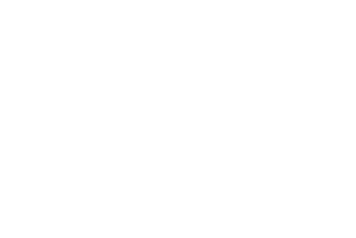

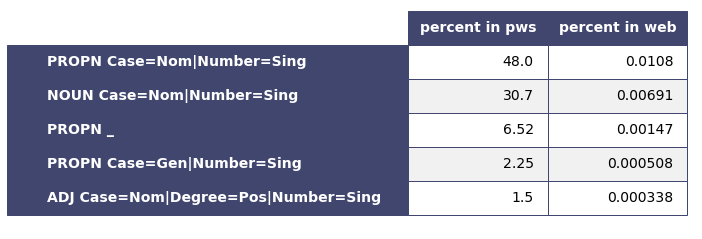

In [32]:
# dff = dfa.copy()
# dff.reset_index(level=0, inplace=True)
# dft = dff[['label','percent in pws','percent in web']].head()
fign = 'posmorphtable_blue'
pngfile = fign + '_' + addin + '.png'
epsfile = fign + '_' + addin + '.eps'

dft=dfa[['percent in pws','percent in web']].head()
rows = [i for i in dft.index]

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

render_mpl_table(dft, header_columns=0, col_width=2.5, rows = rows)


#plt.tight_layout()
#plt.savefig('posmorphtable_blue.png')
plt.savefig(pngfile, bbox_inches='tight')
#plt.savefig('posmorphtable_blue.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig(epsfile, format='eps', dpi=300, bbox_inches='tight');

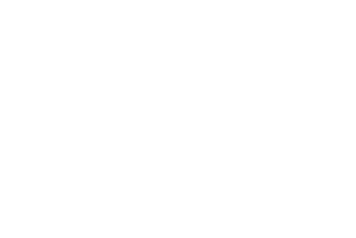

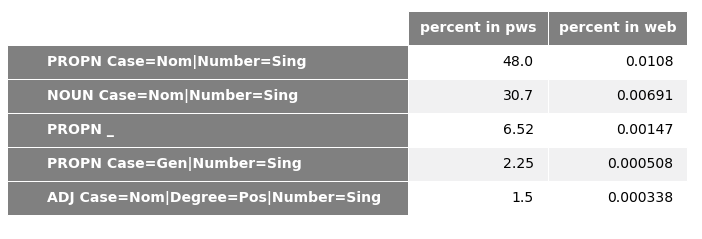

In [33]:
# dff = dfa.copy()
# dff.reset_index(level=0, inplace=True)
# dft = dff[['label','percent in pws','percent in web']].head()
fign = 'posmorphtable_grey'
pngfile = fign + '_' + addin + '.png'
epsfile = fign + '_' + addin + '.eps'

dft=dfa[['percent in pws','percent in web']].head()
rows = [i for i in dft.index]

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

render_mpl_table(dft, header_columns=0, col_width=2.5, rows = rows, header_color='grey',  edge_color='w')

#plt.tight_layout()
#plt.savefig('posmorphtable_grey.png')
plt.savefig(pngfile, format='png', dpi=300, bbox_inches='tight')
plt.savefig(epsfile, format='eps', dpi=300, bbox_inches='tight');

### Top 5 word examples from the top 5 pos+morph categories

In [34]:
df[['word','freq in pws']][df['label']=='NOUN Case=Nom|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
0,salasana,224
1,perkele,167
2,paska,121
3,kakka,110
4,qwerty,109


In [35]:
df[['word','freq in pws']][df['label']=='PROPN Case=Nom|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
9,ville,76
12,antti,73
14,killer,69
15,sami,68
17,mikko,66


In [36]:
df[['word','freq in pws']][df['label']=='PROPN _'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
18,love,65
24,master,58
29,dragon,56
45,the,48
70,dark,38


In [37]:
df[['word','freq in pws']][df['label']=='PROPN Case=Gen|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
10,man,75
149,pokemon,27
332,iron,16
516,batman,12
745,plan,9


In [38]:
# For batman categorie, check a random sample of 10
df[['word','freq in pws']][df['label']=='PROPN Case=Gen|Number=Sing'].sample(10)

,word,freq in pws
1092,bean,7
2913,lapin,3
8577,moran,1
8026,haukion,1
7174,eestin,1
8030,niksun,1
7171,pasin,1
8440,gillian,1
6103,adan,1
11327,kathryn,1


In [39]:
df[['word','freq in pws']][df['label']=='ADJ Case=Nom|Degree=Pos|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
39,rakas,51
53,hullu,45
192,oma,23
193,salainen,23
264,musta,19


### By word frequency in web data

In [40]:
dfw.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
ADV _,290,0.770109,37083012,0.000174
NOUN Case=Nom|Number=Sing,11544,30.655655,27855260,0.006914
PROPN Case=Nom|Number=Sing,18063,47.967177,18343344,0.010818
VERB Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act,151,0.400988,8783623,0.000090
ADJ Case=Nom|Degree=Pos|Number=Sing,564,1.497730,7662995,0.000338


In [41]:
dfw['percent in web'] = dfw['percent in web'].map(lambda x: '{0:.3}'.format(x))
dfw['percent in pws'] = dfw['percent in pws'].map(lambda x: '{0:.3}'.format(x))

In [42]:
dfw.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
ADV _,290,0.77,37083012,0.000174
NOUN Case=Nom|Number=Sing,11544,30.7,27855260,0.00691
PROPN Case=Nom|Number=Sing,18063,48.0,18343344,0.0108
VERB Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act,151,0.401,8783623,9.04e-05
ADJ Case=Nom|Degree=Pos|Number=Sing,564,1.5,7662995,0.000338


## Plots

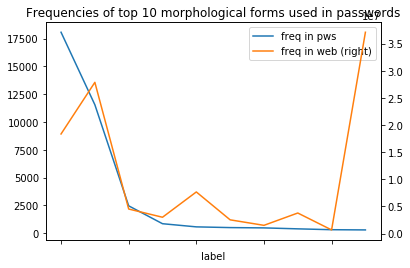

In [43]:
sample = 10
title = 'Frequencies of top ' + str(sample) + ' morphological forms used in passwords'
dfa['freq in pws'][:sample].plot(legend=True, title = title);
dfa['freq in web'][:sample].plot(secondary_y=True, legend=True);

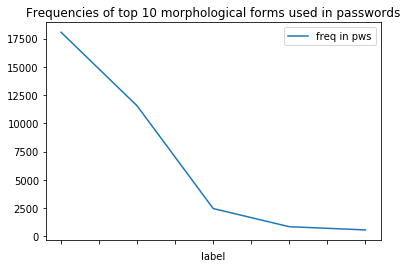

In [44]:
dfb = dfa[:5]
dfb.plot(y = 'freq in pws',x=dfb.index,legend=True, title = title);

### Examples of the most used words

In [45]:
# Most used words, sort the original dataframe by frequency used in pws
dfsort = df.sort_values(['freq in pws'],ascending=False).reset_index(drop=True)

In [46]:
dfsort.head()

,word,freq in pws,freq in web,individual freq,POS,analysis,Finnish word,Finnish name,label
0,salasana,224,16553,16173,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
1,perkele,167,13111,4304,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
2,paska,121,21359,20343,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
3,kakka,110,2820,2786,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
4,qwerty,109,774,283,NOUN,Case=Nom|Number=Sing,False,False,NOUN Case=Nom|Number=Sing


In [47]:
dfsort['word'][:sample].values

array([u'salasana', u'perkele', u'paska', u'kakka', u'qwerty', u'koira',
       u'kissa', u'enkeli', u'nalle', u'ville'], dtype=object)

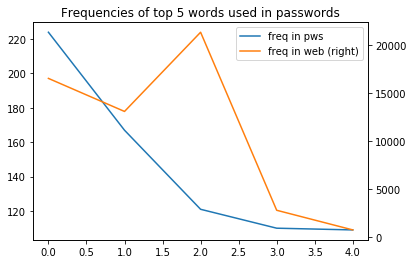

In [48]:
#https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes

sample = 5
title = 'Frequencies of top ' + str(sample) + ' words used in passwords'
x = [str(i) for i in dfsort['word'][:sample]]
dfsort['freq in pws'][:sample].plot(legend=True, title = title, x=x);
dfsort['freq in web'][:sample].plot(secondary_y=True, legend=True, sharex = True);


In [49]:
x

['salasana', 'perkele', 'paska', 'kakka', 'qwerty']

15 15


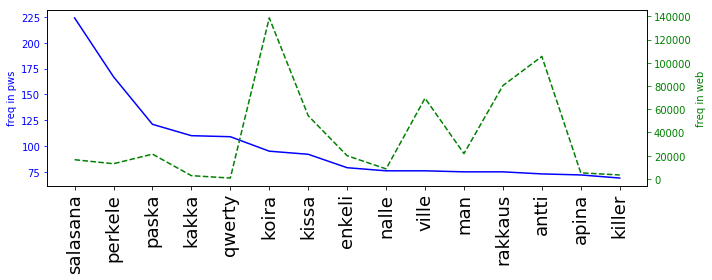

In [50]:
#https://matplotlib.org/gallery/api/two_scales.html

fign = 'wordfreq15'
pngfile = fign + '_' + addin + '.png'
epsfile = fign + '_' + addin + '.eps'

sample = 15

fig, ax1 = plt.subplots(figsize=(10,4))
x = [i for i in dfsort[:sample].index]
x_ticks_labels = [str(i) for i in dfsort['word'][:sample]]
y1 = dfsort['freq in pws'][:sample]
print len(x), len(y1)
ax1.plot(x, y1, 'b-')
#ax1.set_xlabel('words')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('freq in pws', color='b')
ax1.tick_params('y', colors='b')
# Set number of ticks for x-axis
ax1.set_xticks(x)
# Set ticks labels for x-axis
ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

ax2 = ax1.twinx()
y2 = dfsort['freq in web'][:sample]
ax2.plot(x, y2, 'g--')
ax2.set_ylabel('freq in web', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()
#plt.show()
plt.savefig(pngfile, format='png', dpi=300)
plt.savefig(epsfile, format='eps', dpi=300);

In [51]:
# Save smaller sample for combining figures in another notebook
sample = 15
filename = 'top_freqs' + addin + '.csv'
print filename

mydf=pd.DataFrame()
mydf['word'] = [str(i).decode('utf-8') for i in dfsort['word'][:sample]]
mydf['pwfreq'] = [str(i) for i in dfsort['freq in pws'][:sample]]
mydf['webfreq'] = [str(i) for i in dfsort['freq in web'][:sample]]
mydf.to_csv(filename, sep=',', encoding='utf-8', index=False)

top_freqs_78k.csv


10 10


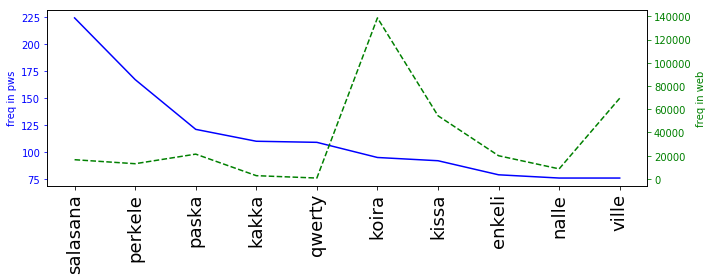

In [52]:
#https://matplotlib.org/gallery/api/two_scales.html

fign = 'wordfreq10'
pngfile = fign + '_' + addin + '.png'
epsfile = fign + '_' + addin + '.eps'

sample = 10

fig, ax1 = plt.subplots(figsize=(10,4))
x = [i for i in dfsort[:sample].index]
x_ticks_labels = [str(i) for i in dfsort['word'][:sample]]
y1 = dfsort['freq in pws'][:sample]
print len(x), len(y1)
ax1.plot(x, y1, 'b-')
#ax1.set_xlabel('words')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('freq in pws', color='b')
ax1.tick_params('y', colors='b')
# Set number of ticks for x-axis
ax1.set_xticks(x)
# Set ticks labels for x-axis
ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

ax2 = ax1.twinx()
y2 = dfsort['freq in web'][:sample]
ax2.plot(x, y2, 'g--')
ax2.set_ylabel('freq in web', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()
#plt.show()
plt.savefig(pngfile, format='png', dpi=300)
plt.savefig(epsfile, format='eps', dpi=300);

5 5


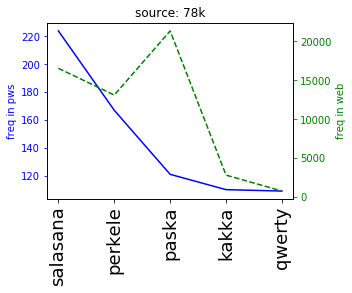

In [53]:
#https://matplotlib.org/gallery/api/two_scales.html

fign = 'wordfreq5'
pngfile = fign + '_' + addin + '.png'
epsfile = fign + '_' + addin + '.eps'

title = 'source: 78k'

sample = 5

fig, ax1 = plt.subplots(figsize=(5,4))
x = [i for i in dfsort[:sample].index]
x_ticks_labels = [str(i) for i in dfsort['word'][:sample]]
y1 = dfsort['freq in pws'][:sample]
print len(x), len(y1)
ax1.plot(x, y1, 'b-')
#ax1.set_xlabel('words')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('freq in pws', color='b')
ax1.tick_params('y', colors='b')
# Set number of ticks for x-axis
ax1.set_xticks(x)
# Set ticks labels for x-axis
ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

ax2 = ax1.twinx()
y2 = dfsort['freq in web'][:sample]
ax2.plot(x, y2, 'g--')
ax2.set_ylabel('freq in web', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()
plt.title(title)
#plt.show()
plt.savefig(pngfile, format='png', dpi=300)
plt.savefig(epsfile, format='eps', dpi=300);

8 8


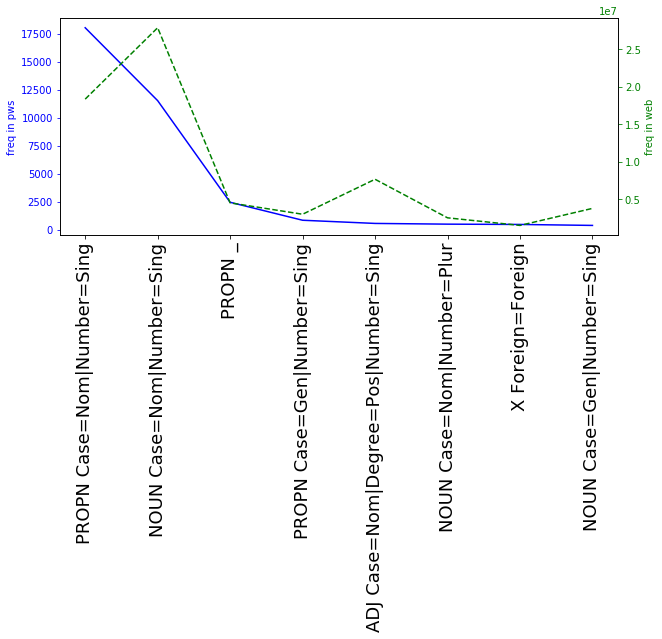

In [54]:
#https://matplotlib.org/gallery/api/two_scales.html

sample = 8
#title = 'Frequencies of top ' + str(sample) + ' words used in passwords'

fig, ax1 = plt.subplots(figsize=(10,4))
x = [i for i, val in enumerate(dfa[:sample].index)]
x_ticks_labels = [str(i) for i in dfa[:sample].index]
y1 = dfa['freq in pws'][:sample]
print len(x), len(y1)
ax1.plot(x, y1, 'b-')
ax1.set_xlabel('')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('freq in pws', color='b')
ax1.tick_params('y', colors='b')
# Set number of ticks for x-axis
ax1.set_xticks(x)
# Set ticks labels for x-axis
ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

ax2 = ax1.twinx()
y2 = dfa['freq in web'][:sample]
ax2.plot(x, y2, 'g--')
ax2.set_ylabel('freq in web', color='g')
ax2.tick_params('y', colors='g')

#fig.tight_layout()
plt.show()